In [9]:
%matplotlib inline

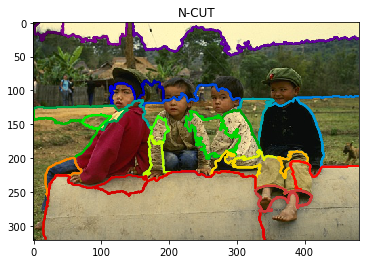

In [10]:
from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt
import scipy
import numpy as np

from skimage.io import imsave
from skimage.segmentation import find_boundaries

# path = "/home/yy/"

def image_segmentation(image_name): 
    path = "/home/yy/hust_lab/CV/github_spectral_clustering/reconstruct_project/segmentation_results/ncut/" + image_name + ".png"
    image = "/home/yy/berkeley_datasets/BSR/BSDS500/data/images/test/" + image_name + ".jpg"

    img = scipy.misc.imread(image)
    labels1 = segmentation.slic(img, compactness=30, n_segments=200)
    out1 = color.label2rgb(labels1, img, kind='avg')

    g = graph.rag_mean_color(img, labels1, mode='similarity')
    labels2 = graph.cut_normalized(labels1, g)
    out2 = color.label2rgb(labels2, img, kind='avg')

    labelVec = []
    for i in range(labels2.shape[0]):
        for j in range(labels2.shape[1]):
            if labels2[i][j] not in labelVec:
                labelVec.append(labels2[i][j])
#     print(labelVec)

    plt.figure()
    plt.title("N-CUT")
    plt.imshow(img)
    for l in range(len(labelVec)):
        plt.contour(labels2==labelVec[l], contour=1, colors=[plt.cm.spectral(l/float(len(labelVec)))])
#     plt.show()

    # generate png
    seg = find_boundaries(labels2).astype(np.uint8)
    for i in range(0, seg.shape[0]):
        for j in range(0, seg.shape[1]):
            if seg[i, j] == 1:
                seg[i, j] = 255
    imsave(path, seg, cmap='gray')
            
if __name__ == "__main__":
#     image_list = ["2018", "3063", "5096", "6046", "8068", "10081", "14085", "14092", "15011", "15062"]
    image_list = ["15011"]
    for image_name in image_list:
        image_segmentation(image_name)
        
        plt.show()



# Normalized Cut


This example constructs a Region Adjacency Graph (RAG) and recursively performs
a Normalized Cut on it [1]_.

References
----------
.. [1] Shi, J.; Malik, J., "Normalized cuts and image segmentation",
       Pattern Analysis and Machine Intelligence,
       IEEE Transactions on, vol. 22, no. 8, pp. 888-905, August 2000.

